In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# import tensorflow
import tensorflow as tf
#import keras 
from tensorflow import keras

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc

In [ ]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

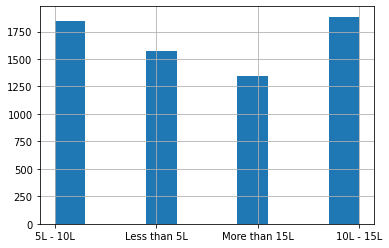

In [ ]:
train_df['Income'].hist()

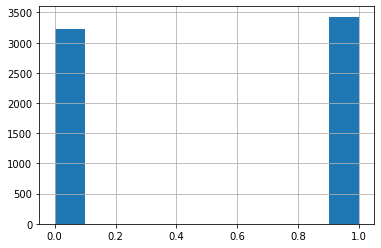

In [ ]:
train_df['Transaction_Status'].hist()

In [ ]:
train_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


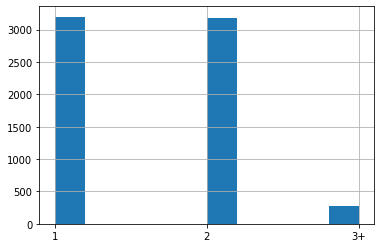

In [ ]:
train_df["Product_Holdings"].hist()

In [ ]:

# sns.pairplot(train_df, hue ='Is_Churn')

In [ ]:
train_df.isnull().sum()   # no null values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

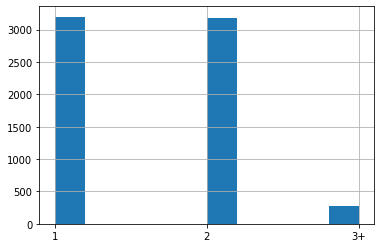

In [ ]:
train_df['Product_Holdings'].hist()

In [ ]:
train_Y=train_df["Is_Churn"]

In [ ]:
# c=0
# for i in range(0,6650):
#   if(train_df['Product_Holdings'][i]=='3+'):
#     c=c+1
# print(c)

In [ ]:
train_data=train_df.drop(['Is_Churn', 'ID'], axis=1)

In [ ]:
train_data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor
4,39,Female,More than 15L,893146.23,1,1,1,1,Good


In [ ]:
 test_data=test_df.drop(['ID'], axis=1)

In [ ]:
test_data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [ ]:
# # train#
list1=[]
for i in range(0,6650):
  if(train_data['Product_Holdings'][i]=='1'):
    list1.append(1)
  if(train_data['Product_Holdings'][i]=='2'):
    list1.append(2)
  if(train_data['Product_Holdings'][i]=='3+'):
    list1.append(3)
fr=pd.DataFrame(list1, columns=["Product_Holdings"])
train_data=train_data.drop(['Product_Holdings'], axis=1)
train_data=pd.concat([train_data,fr],axis=1)
# test data#
test_data=test_df.drop(['ID'], axis=1)
list2=[]
for i in range(0,2851):
  if(test_data['Product_Holdings'][i]=='1'):
    list2.append(1)
  if(test_data['Product_Holdings'][i]=='2'):
    list2.append(2)
  if(test_data['Product_Holdings'][i]=='3+'):
    list2.append(3)
fr1=pd.DataFrame(list2, columns=['Product_Holdings'])
test_data=test_data.drop(['Product_Holdings'], axis=1)
test_data=pd.concat([test_data,fr1],axis=1)

In [ ]:
##
train_data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Credit_Card,Credit_Category,Product_Holdings
0,36,Female,5L - 10L,563266.44,4,0,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,Poor,1
2,35,Female,More than 15L,701607.06,2,1,0,Poor,2
3,43,Female,More than 15L,1393922.16,0,1,1,Poor,2
4,39,Female,More than 15L,893146.23,1,1,1,Good,1


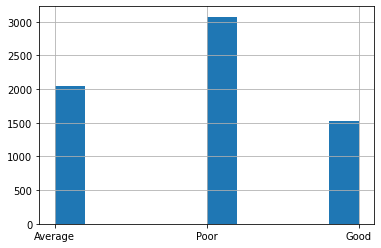

In [ ]:
train_data['Credit_Category'].hist()

In [ ]:
# # train#
# list3=[]
# for i in range(0,6650):
#   if(train_df['Gender'][i]=='Female'):
#     list3.append(1)
#   if(train_df['Gender'][i]=='Male'):
#     list3.append(0)
 
# fr=pd.DataFrame(list3, columns=["Gender"])
# train_data=train_df.drop(['Gender'], axis=1)
# train_data=pd.concat([train_data,fr],axis=1)
# # test data#
# # test_data=test_df.drop(['ID'], axis=1)
# list4=[]
# for i in range(0,2851):
#   if(test_data['Gender'][i]=='Female'):
#     list2.append(1)
#   if(test_data['Gender'][i]=='Female'):
#     list2.append(2)
#   if(test_data[''][i]=='Poor'):
#     list2.append(3)
# fr1=pd.DataFrame(list2, columns=['Credit_Category'])
# test_data=test_data.drop(['Credit_Category'], axis=1)
# test_data=pd.concat([test_data,fr1],axis=1)

In [ ]:
test_data.shape

(2851, 9)

In [ ]:
list3=[]
for i in range(0,6650):
  if(train_data['Credit_Category'][i]=='Average'):
    list3.append(2)
  if(train_data['Credit_Category'][i]=='Good'):
    list3.append(1)
  if(train_data['Credit_Category'][i]=='Poor'):
    list3.append(3)
fr=pd.DataFrame(list3, columns=["Credit_Category"])
train_data=train_data.drop(['Credit_Category'], axis=1)
train_data=pd.concat([train_data,fr],axis=1)

In [ ]:
list4=[]
for i in range(0,2851):
  if(test_data['Credit_Category'][i]=='Average'):
    list4.append(2)
  if(test_data['Credit_Category'][i]=='Good'):
    list4.append(1)
  if(test_data['Credit_Category'][i]=='Poor'):
    list4.append(3)
fr=pd.DataFrame(list4, columns=["Credit_Category"])
test_data=test_data.drop(['Credit_Category'], axis=1)
test_data=pd.concat([test_data,fr],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train_data["Gender"] = lb_make.fit_transform(np.array(train_data["Gender"]))

# train_data["Credit_Category"] = lb_make.fit_transform(np.array(train_data["Credit_Category"]))
train_data["Income"] = lb_make.fit_transform(np.array(train_data["Income"]))
test_data["Gender"] = lb_make.fit_transform(np.array(test_data["Gender"]))
test_data["Income"] = lb_make.fit_transform(np.array(test_data["Income"]))

# test_data["Credit_Category"] = lb_make.fit_transform(np.array(test_data["Credit_Category"]))

In [ ]:
train_data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Credit_Card,Product_Holdings,Credit_Category
0,36,0,1,563266.44,4,0,0,1,2
1,53,0,2,875572.11,2,1,1,1,3
2,35,0,3,701607.06,2,1,0,2,3
3,43,0,3,1393922.16,0,1,1,2,3
4,39,0,3,893146.23,1,1,1,1,1


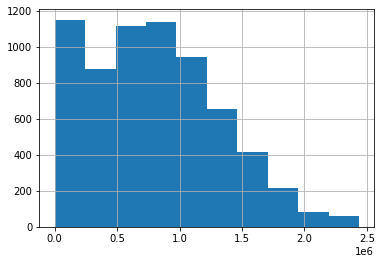

In [ ]:
train_data['Balance'].hist()

In [ ]:
test_data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Credit_Card,Product_Holdings,Credit_Category
0,50,0,3,1008636.39,2,1,1,2,2
1,36,1,1,341460.72,2,0,1,2,2
2,25,0,0,439460.10,0,0,1,2,1
3,41,1,2,28581.93,0,1,1,2,3
4,48,1,3,1104540.03,2,1,0,3,1


In [ ]:
train_data.corr()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Credit_Card,Credit_Category
Age,1.000000,0.004851,-0.005011,0.002154,0.017353,0.032166,0.012089,0.008816
Gender,0.004851,1.000000,-0.007610,0.017546,-0.001824,0.010854,-0.007461,-0.001578
Income,-0.005011,-0.007610,1.000000,0.001582,-0.029539,-0.004818,0.006145,-0.002315
Balance,0.002154,0.017546,0.001582,1.000000,-0.019385,-0.005088,-0.025259,0.011420
Vintage,0.017353,-0.001824,-0.029539,-0.019385,1.000000,-0.027286,0.001856,-0.011170
Transaction_Status,0.032166,0.010854,-0.004818,-0.005088,-0.027286,1.000000,0.006526,-0.028573
Credit_Card,0.012089,-0.007461,0.006145,-0.025259,0.001856,0.006526,1.000000,-0.007346
Credit_Category,0.008816,-0.001578,-0.002315,0.011420,-0.011170,-0.028573,-0.007346,1.000000


In [ ]:
# X_train=pd.get_dummies(train_data)
# X_test=pd.get_dummies(test_data)

In [ ]:
# print(X_train.shape)
# print(X_test.shape)

In [ ]:
# X_test.head()

In [ ]:
# X_train.head()


In [ ]:
# X_train['Vintage'].hist()

In [ ]:
# train_Y.hist()    # Imbalnced Dataset

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(train_data.corr(),annot=True)
# plt.show()

In [ ]:
scale_cols = ['Age','Balance']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train_data[scale_cols] = scale.fit_transform(train_data[scale_cols])
test_data[scale_cols] = scale.fit_transform(test_data[scale_cols])

In [ ]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(X_train)
# x_test = sc.transform(X_test)

In [ ]:
train_data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Credit_Card,Product_Holdings,Credit_Category
0,0.294118,0,1,0.231148,4,0,0,1,2
1,0.627451,0,2,0.359323,2,1,1,1,3
2,0.274510,0,3,0.287925,2,1,0,2,3
3,0.431373,0,3,0.572062,0,1,1,2,3
4,0.352941,0,3,0.366536,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
6645,0.784314,1,1,0.555893,4,1,1,2,3
6646,0.411765,0,1,0.244700,3,1,1,2,2
6647,0.156863,1,2,0.401894,2,0,0,2,3
6648,0.882353,0,0,0.162184,3,0,1,2,3


In [ ]:
test_data

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Credit_Card,Product_Holdings,Credit_Category
0,0.568627,0,3,0.413891,2,1,1,2,2
1,0.294118,1,1,0.139709,2,0,1,2,2
2,0.078431,0,0,0.179983,0,0,1,2,1
3,0.392157,1,2,0.011128,0,1,1,2,3
4,0.529412,1,3,0.453303,2,1,0,3,1
...,...,...,...,...,...,...,...,...,...
2846,0.372549,0,0,0.549434,0,0,1,1,3
2847,0.529412,0,3,0.594567,0,1,1,2,2
2848,0.745098,1,3,0.451666,3,0,1,1,3
2849,0.254902,0,1,0.616980,2,0,1,1,3


In [ ]:
# scaler=MinMaxScaler()

In [ ]:
# x_train=scaler.fit_transform(X_train)
# x_test=scaler.transform(X_test)

In [ ]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(train_data, train_Y)
# x_smote_test, y_smote_test = smote.fit_resample(X_test, train_Y)

# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_ros))

In [ ]:
x_train, x_valid, y_train, y_valid=train_test_split(x_smote,y_smote,random_state=60,test_size=0.3)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

In [ ]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1525
           1       0.73      0.75      0.74      1543

    accuracy                           0.73      3068
   macro avg       0.73      0.73      0.73      3068
weighted avg       0.73      0.73      0.73      3068



In [ ]:
# x_smote.hist()

In [ ]:
# # df1=pd.DataFrame(x_smote)
# df2=pd.DataFrame(y_smote)

In [ ]:
# df2.hist()    # balanced data

In [ ]:
# new_df=pd.concat([df1,df2],axis=1)

In [ ]:
# new_df

In [ ]:
# new_df=new_df.rename(columns={"0": "Age", "1": "Gender","2": "Income","3": "Balance","4": "Vintage","5": "Transaction_Status","6": "Product_Holdings","7": "Credit_Card","8": "Credit_Category"})

In [ ]:
# columns=['Age',	'Gender',	'Income',	'Balance',	'Vintage'	,'Transaction_Status',	'Product_Holdings',	'Credit_Card'	,'Credit_Category']

In [ ]:
# new_df

In [ ]:
# x_train=scaler.fit_transform(x_smote)
# x_test=scaler.transform(x_valid)

In [ ]:
# X_train.shape

In [ ]:

# X_test.shape

In [ ]:

# from xgboost import XGBClassifier

# model = XGBClassifier()
# model.fit(x_smote, y_smote)
# y_pred = model.predict(test_data)

In [ ]:
# print(classification_report(y_valid, pred))

In [ ]:
# from sklearn.svm import SVC  
# clf = SVC(kernel='poly') 
  
# # fitting x samples and y classes 
# clf.fit(x_smote,y_smote)
# y_pred = clf.predict(X_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier()

# # fit the predictor and target
# rfc.fit(x_smote, y_smote)

# # # predict
# y_pred = rfc.predict(test_data)# check performance
# # # print('ROCAUC score:',roc_auc_score(y_valid, rfc_predict))
# print('Accuracy score:',accuracy_score(y_valid, rfc_predict))
# print('F1 score:',f1_score(y_valid, rfc_predict))

In [ ]:
# ## DECISION TREE

# dtree=DecisionTreeClassifier()
# dtree.fit(x_smote,y_smote)
# y_pred = dtree.predict(test_data)

In [ ]:

# from sklearn.neighbors import KNeighborsClassifier

In [ ]:

  
# knn = KNeighborsClassifier(n_neighbors =3)
  
# knn.fit(train_data,train_Y)
# y_pred = knn.predict(test_data)
 #################################### 
# Predictions and Evaluations
# # Let's evaluate our KNN model ! 
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_valid, pred))
  
# print(classification_report(y_valid, pred))###################################

In [ ]:
# y_pred=clf.predict(x_valid)

In [ ]:
# accuracy_score(y_test,y_pred)

In [ ]:
# f1_score(y_valid,y_pred, average="macro")

In [ ]:
#############################################

In [ ]:
# define sequential model
# model = keras.Sequential([
#     # input layer
#     keras.layers.Dense(14, input_shape=(14,), activation='relu'),
#     keras.layers.Dense(11, activation='relu'),
#     keras.layers.Dense(9, activation='relu'),
#     keras.layers.Dense(7, activation='relu'),
#     keras.layers.Dense(5, activation='relu'),
    
#     keras.layers.Dense(3,activation = 'relu'),
#     # we use sigmoid for binary output
#     # output layer
#     keras.layers.Dense(1, activation='sigmoid')
# ]
# )

In [ ]:
# # time for compilation of neural net.
# model.compile(optimizer = 'adam',
#              loss = 'binary_crossentropy',
#              metrics = ['accuracy'])
# # now we fit our model to training data
# model.fit(x_smote,y_smote,epochs=100)

In [ ]:
# # predict the churn values
# y_pred = model.predict(X_test)

In [ ]:
# ypred_lis = []
# for i in y_pred:
#     if i>0.5:
#         ypred_lis.append(1)
#     else:
#         ypred_lis.append(0)
# print(ypred_lis)

In [ ]:
pred=pd.DataFrame(y_pred, columns=["Is_Churn"])

In [ ]:
pred

,Is_Churn
0,1
1,0
2,0
3,0
4,0
...,...
2846,1
2847,1
2848,1
2849,0


In [ ]:
test_df['ID']

0       55480787
1       9aededf2
2       a5034a09
3       b3256702
4       dc28adb5
          ...   
2846    19e40adf
2847    52d5bc8d
2848    f708121b
2849    f008715d
2850    36b81f59
Name: ID, Length: 2851, dtype: object

In [ ]:
out=pd.concat([test_df['ID'], pred], axis=1)

In [ ]:
out

,ID,Is_Churn
0,55480787,1
1,9aededf2,0
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,1
2847,52d5bc8d,1
2848,f708121b,1
2849,f008715d,0


In [ ]:
out.to_csv("xgboost_0.csv", index=False)

In [ ]:
##############